# Worksheet 2

In [1]:
%matplotlib inline

# Questions

## Question 1

Perform the $LU$ decomposition of

$$
  A = \begin{pmatrix} 1 & 3 \\ 4 & 16 \end{pmatrix}.
$$

Use both standard factorisation methods.

## Question 2

Write out the Thomas algorithm for a tridiagonal system.

## Question 3

Write down the general framework for iterative methods for linear systems. Give the convergence matrix. If the linear system uses the matrix $A$ above, will an iterative method converge? [Hint: remember what to do with the diagonal entries]

## Question 4

Check which of the matrices on this sheet are diagonally dominant.

## Question 5

Briefly explain what is meant by quadrature methods based on polynomial interpolation.

## Question 6

Write down the contraction mapping theorem. Check that $g(x) = \cos(x)$ is contracting on the unit interval.

## Coding Question 1

Write a code to do $LU$ decomposition. Check the decomposition of

$$
  B = \begin{pmatrix} 64 & 8 & 48 \\ 24 & 28 & 53 \\ 32 & 49 & 91 \end{pmatrix}.
$$

## Coding Question 2

Implement the Thomas Algorithm for a tridiagonal system. Test this on the tridiagonal matrix constructed from $B$ above, i.e. on the system

$$
  \begin{pmatrix} 62 & 8 & 0 \\ 24 & 28 & 53 \\ 0 & 49 & 91 \end{pmatrix} {\bf x} = \begin{pmatrix} 3 \\ 2 \\ 1 \end{pmatrix}.
$$

## Coding Question 3

Implement the Jacobi method for linear systems. Investigate the behaviour of the method for the problem

$$
  B {\bf x} = \begin{pmatrix} 3 \\ 2 \\ 1 \end{pmatrix}
$$

starting from the trivial initial guess ${\bf x}^{(0)} = {\bf 0}$. Should this be expected? [Hint: Check the convergence theorem]

In addition and for comparison, try the problem using the matrix

$$
  C = \begin{pmatrix} \frac{119}{108} & -\frac{14}{27} & -\frac{8}{9} \\ \frac{7}{54} & \frac{46}{27} & \frac{7}{9} \\ \frac{5}{108} & \frac{1}{27} & \frac{23}{17}  \end{pmatrix}.
$$

## Coding Question 4

Implement the Gauss-Seidel method, applying it to the convergent problem above. Compare the convergence rate to Jacobi.

## Coding Question 5

Implement the chord method to find the root of

$$
  f(x) = \tan (x) - e^{-x}, \quad x \in [0, 1].
$$

# Answers

## Question 1

Perform the $LU$ decomposition of

$$
  A = \begin{pmatrix} 1 & 3 \\ 4 & 16 \end{pmatrix}.
$$

Use both standard factorisation methods.

### Answer 1

The general algorithm is laid out in the notes. In particular, when calculating the next entry, we will need to either use the formula

$$
  u_{k j} = \left( a_{k j} - \sum_{s = 1}^{k - 1} \ell_{k s} u_{s j} \right) / \ell_{k k}
$$
or
$$
  \ell_{i k} = \left( a_{i k} - \sum_{s = 1}^{k - 1} \ell_{i s} u_{s k} \right) / u_{k k}.
$$


#### Doolittle factorisation

First consider the Doolittle factorisation, where the diagonal elements of $L$, $\ell_{k k}$ are set to 1.

Build the first entry of $U$ using

$$
  u_{1 1} = \left( a_{1 1} - \sum_{s = 1}^{0} \ell_{1 s} u_{s 1} \right) / \ell_{1 1} = a_{1 1} = 1.
$$

Then work along the first row of $U$, finding

$$
  u_{1 2} = \left( a_{1 2} - \sum_{s = 1}^{0} \ell_{1 s} u_{s 2} \right) / \ell_{1 1} = a_{1 2} = 3.
$$

We can then work down the first column of $L$, finding

$$
  \ell_{2 1} = \left( a_{2 1} - \sum_{s = 1}^{0} \ell_{2 s} u_{s 1} \right) / u_{1 1} = a_{2 1} / u_{1 1} = 4.
$$

Finally we need the bottom right element of $U$, finding

$$
  u_{2 2} = \left( a_{2 2} - \sum_{s = 1}^{1} \ell_{2 s} u_{s 2} \right) / \ell_{2 2} = a_{2 2} - \ell_{2 1} u_{1 2} = 16 - 4 \times 3 = 4.
$$

Hence we have

$$
  L = \begin{pmatrix} 1 & 0 \\ 4 & 1 \end{pmatrix} \quad U = \begin{pmatrix} 1 & 3 \\ 0 & 4 \end{pmatrix}.
$$

#### Crout factorisation

Next consider the Crout factorisation, where the diagonal elements of $U$, $U_{k k}$ are set to 1.

Build the first entry of $L$ using

$$
  \ell_{1 1} = \left( a_{1 1} - \sum_{s = 1}^{0} \ell_{1 s} u_{s 1} \right) / u_{1 1} = a_{1 1} = 1.
$$

We can then work along the first row of $U$, finding

$$
  u_{1 2} = \left( a_{1 2} - \sum_{s = 1}^{0} \ell_{1 s} u_{s 2} \right) / \ell_{1 1} = a_{1 2} = 3.
$$

Then work down the first column of $L$, finding

$$
  \ell_{2 1} = \left( a_{2 1} - \sum_{s = 1}^{0} \ell_{2 s} u_{s 1} \right) / u_{1 1} = a_{2 1} / u_{1 1} = 4.
$$

Finally we need the bottom right element of $L$, finding

$$
  \ell_{2 2} = \left( a_{2 2} - \sum_{s = 1}^{1} \ell_{2 s} u_{s 2} \right) / u_{2 2} = a_{2 2} - \ell_{2 1} u_{1 2} = 16 - 4 \times 3 = 4.
$$

Hence we have

$$
  L = \begin{pmatrix} 1 & 0 \\ 4 & 4 \end{pmatrix} \quad U = \begin{pmatrix} 1 & 3 \\ 0 & 1 \end{pmatrix}.
$$

Note that in this case only one entry between the matrices has been switched: in general the results may be very different.

## Question 2

Write out the Thomas algorithm for a tridiagonal system.

### Answer 2

We assume that the tridiagonal matrix $A$ has diagonal entries $b_i , i = 1, . . . , N$, sub-diagonal entries $a_j , j = 1, . . . , N − 1$, and super-diagonal entries $c_j , j = 1, . . . , N − 1$. We assume that we are trying to solve the problem

$$
  A {\bf x} = {\bf f},
$$

which has size $N$.

The Thomas algorithm is essentially Gaussian elimination; forward elimination is used to get an upper triangular problem, and then back substitution used to find the answer. The tridiagonal nature of the problem means that it is sufficiently simple to write it out explicitly.

The first step is the forward elimination process. This yields the system

$$
  B {\bf x} = {\bf y},
$$

where $B$ has entries only on the diagonal, and these entries are all 1, and on the super-diagonal,
which are written as $c_j /d_j , j = 1, . . . , N − 1$. The vectors ${\bf d}, {\bf y}$ are given by the procedure

1. At the first step $d_1 = b_1$ and $y_1 = f_1 /d_1$ ;
2. At the $k$-th step $d_k = b_k − a_{k−1} c_{k−1} / d_{k−1}$ and $y_k = (f_k − y_{k−1} a_{k−1} ) / d_k$.

We can then solve this simplified system using back substitution to find

1. At the first step $x_N = y_N$;
2. In reverse order, $k = N − 1, . . . , 1$ we have $x_k = y_k − x_{k+1} c_k / d_k$.


## Question 3

Write down the general framework for iterative methods for linear systems. Give the convergence matrix. If the linear system uses the matrix $A$ above, will an iterative method converge? [Hint: remember what to do with the diagonal entries]

### Answer 3

The system to be solved is

$$
  A {\bf x} = {\bf b},
$$

with $\det(A) = 0$. We first scale the problem such that all diagonal entries of $A$ are 1. We split the coefficient matrix $A$ into the matrices $N$, $P$, such that

$$
  A = N − P
$$

where $\det(N) = 0$. We therefore have that

$$
  N {\bf x} = P {\bf x} + {\bf b}
$$

and we use this to write an iteration scheme as

$$
  N {\bf x}^{(n)} = P {\bf x}^{(n−1)} + {\bf b}, \quad n = 1, 2, 3, \dots
$$

where we start from some arbitrary initial guess $x^{(0)}$.

The convergence matrix $M$ is given by $M = N^{−1} P$. Convergence is guaranteed if the spectral radius of $M$, which is the largest eigenvalue (in magnitude), is less than one. For the matrix given in the first part we have the rescaled $A$ is

$$
  A = \begin{pmatrix} 1 & 3 \\ 4 & 16 \end{pmatrix}.
$$

Clearly to talk about convergence we need to first decide how to split $A$ into $N$, $P$ matrices. For simplicity we consider Jacobi’s method for which $N = I$ and hence we have

$$
\begin{aligned}
  && N & = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}, \\
  && P & = \begin{pmatrix} 0 & -3 \\ -1/4 & 0 \end{pmatrix}, \\
  && M & = N^{-1} P \\
  &&   & = P \\
  &&   & = \begin{pmatrix} 0 & -3 \\ -1/4 & 0 \end{pmatrix} \\
  \implies && \rho(M) & = \max_i | \lambda_i | \\
  &&   & = \max \left\{ \pm \sqrt{3/4} \right\} \\
  &&   & = \sqrt{3/4} \\
  &&   & < 1.
\end{aligned}
$$

Therefore Jacobi will converge for this matrix.

## Question 4

Check which of the matrices on this sheet are diagonally dominant.

### Answer 4

For (strict) diagonal dominance we need the absolute value of the diagonal coefficient to be (strictly) greater than the sum of the absolute values of all other coefficients in the row.

For $A$ this is not true; for the first row we have $1 \not{>} 3$, although dominance holds for the second row.

For $B$ it is not true; for the second row we have $28 \not{>} 24 + 53$, although dominance holds for the other rows.

For $C$ it is not true; for the first row it fails, although dominance holds for the other rows.

## Question 5

Briefly explain what is meant by quadrature methods based on polynomial interpolation.

### Answer 5

*Standard exam question; see, e.g., 07/08.*

The function $f(x)$ to be integrated is replaced by an interpolating function, in this case a polynomial of degree $n$, that interpolates it at $n + 1$ *nodes* $x_j , j = 0, 1, \dots , n$. In general, when constructing a compound quadrature formula, we may split the interval into subintervals, each subinterval containing $n + 1$ nodes, and use a polynomial interpolating function on each subinterval. The integral of the function is approximated by the integral of the (piecewise polynomial) interpolating function.

## Question 6

Write down the contraction mapping theorem. Check that $g(x) = \cos(x)$ is contracting on the unit interval.

### Answer 6

The contraction mapping theorem is

> If $g(x)$ is a contraction mapping in an interval $I = [a, b]$ then there exists one and only one fixed point of the map in $[a, b]$.

In order to state we need the definition of a contraction mapping, which is

> **Definition** - A continuous map $g(x)$ from an interval $I = [a, b] \subseteq {\mathbb R}$ into ${\mathbb R}$ is contracting (or a contraction mapping) if
>
> 1. the image of $I$ is contained in $I$:
> $$\begin{aligned}
    && g(I) &\subseteq I \\
    \Leftrightarrow && g(x) & \in I \quad \forall x \in I.
  \end{aligned}$$
> 2. the function $g(x)$ is Lipschitz continuous in $I$ with Lipschitz constant $L < 1$:
> $$
    |g(x) − g(y)| \leq L |x − y| \quad \forall x, y \in I.
  $$

Given this we want to check $g(x) = \cos(x)$ on $I = [0, 1]$. We have that $g$ is continuous and differentiable, so it must be Lipschitz continuous. We know that $L < \max_x \in I | g(x) |$ so we look at $g = − \sin(x)$. We note that the extrema of $g$ occur when $g = − \cos(x) = 0$ which is at $x = (n + 1/2) \pi$, of which none occur in the interval $[0, 1]$. We also note that $g$ is monotonic on the interval. Therefore the extreme values of $g$ are taken at the ends of the interval and are $[0, − \sin(1)]$, which are both less than 1 in absolute value. So $L < 1$.

We also need to check that $g(I) \subseteq I$. Again we note that $g$ is monotonic on the interval. Hence we only need to check that $g(0) = 1 \in I$ and $g(1) = \cos(1) \in I$, both of which hold. Therefore the map is contracting.

## Coding Question 1

Write a code to do $LU$ decomposition. Check the decomposition of

$$
  B = \begin{pmatrix} 64 & 8 & 48 \\ 24 & 28 & 53 \\ 32 & 49 & 91 \end{pmatrix}.
$$

First we should note that python has an $LU$ decomposition algorithm in `scipy.linalg.lu` or `scipy.linalg.lu_factor`. The results produced by that algorithm will not necessarilly match those produced from the algorithm in the notes, as the python implementation includes pivoting (which is the best thing to do in a practical code, but not considered here).

Instead we re-implement the algorithm without pivoting. We will use the Doolittle factorisation.

### Answer Coding Question 1

In [2]:
import numpy
from scipy import linalg

In [3]:
def LU_decomposition(A):
    """
    Perform LU decomposition using the Doolittle factorisation.
    """
    
    L = numpy.zeros_like(A)
    U = numpy.zeros_like(A)
    N = numpy.size(A, 0)
    
    for k in range(N):
        L[k, k] = 1
        U[k, k] = (A[k, k] - numpy.dot(L[k, :k], U[:k, k])) / L[k, k]
        for j in range(k+1, N):
            U[k, j] = (A[k, j] - numpy.dot(L[k, :k], U[:k, j])) / L[k, k]
        for i in range(k+1, N):
            L[i, k] = (A[i, k] - numpy.dot(L[i, :k], U[:k, k])) / U[k, k]
    
    return L, U


In [4]:
B = numpy.array([[64.0, 8.0, 48.0],
                 [24.0, 28.0, 53.0],
                 [32.0, 49.0, 91.0]])
[L, U] = LU_decomposition(B)
print("The LU decomposition of\n\n{}\n\n"
      "is\n\n{}\n\n{}\n\n".format(B, L, U))
print("Cross check product:\n{}".format(numpy.dot(L, U)))

# Also check the result from theory question 1.
A = numpy.array([[1.0, 3.0], [4.0, 16.0]])
[L, U] = LU_decomposition(A)
print("\n\n\nThe LU decomposition of\n\n{}\n\nis\n\n{}\n\n{}\n\n"\
      .format(A, L, U))
print("Cross check product:\n{}".format(numpy.dot(L, U)))

The LU decomposition of

[[ 64.   8.  48.]
 [ 24.  28.  53.]
 [ 32.  49.  91.]]

is

[[ 1.     0.     0.   ]
 [ 0.375  1.     0.   ]
 [ 0.5    1.8    1.   ]]

[[ 64.   8.  48.]
 [  0.  25.  35.]
 [  0.   0.   4.]]


Cross check product:
[[ 64.   8.  48.]
 [ 24.  28.  53.]
 [ 32.  49.  91.]]



The LU decomposition of

[[  1.   3.]
 [  4.  16.]]

is

[[ 1.  0.]
 [ 4.  1.]]

[[ 1.  3.]
 [ 0.  4.]]


Cross check product:
[[  1.   3.]
 [  4.  16.]]


## Coding Question 2

Implement the Thomas Algorithm for a tridiagonal system.

Note that we shall test this on the tridiagonal matrix constructed from $B$ above, i.e. on the system

$$
  \begin{pmatrix} 62 & 8 & 0 \\ 24 & 28 & 53 \\ 0 & 49 & 91 \end{pmatrix} {\bf x} = \begin{pmatrix} 3 \\ 2 \\ 1 \end{pmatrix}.
$$

### Answer Coding Question 2

In [5]:
def ThomasAlgorithm(a, b, c, f):
    """Implement the Thomas algorithm to solve A x = f. 
    The vectors a, b, c are the sub-diagonal, diagonal and super-diagonal 
    vectors of the original matrix A."""
    
    # Make copies of the input
    aa = a.copy()
    bb = b.copy()
    cc = c.copy()
    
    x = numpy.zeros_like(f)
    d = numpy.zeros_like(f)
    d[:] = f[:]
    N = len(f)
    for k in range(1, N):
        m = aa[k-1] / bb[k-1]
        bb[k] -= m * cc[k-1]
        d[k] -= m * d[k-1]
    x[-1] = d[-1] / bb[-1]
    for k in range(N-2, -1, -1):
        x[k] = (d[k] - cc[k] * x[k+1]) / bb[k]
    
    return x

In [6]:
D = numpy.array([[62.0, 8.0, 0.0],
                 [24.0, 28.0, 53.0],
                 [0.0, 49.0, 91.0]])
b = numpy.array([3.0, 2.0, 1.0])
x = ThomasAlgorithm(numpy.diag(D, -1), numpy.diag(D), numpy.diag(D, +1),
                    b)
print("Solution of A x = f where\n\nA = {}\n\nf = {}\n\n is\n\nx = {}".\
      format(D, b, x))

Solution of A x = f where

A = [[ 62.   8.   0.]
 [ 24.  28.  53.]
 [  0.  49.  91.]]

f = [ 3.  2.  1.]

 is

x = [ 0.05748415 -0.07050219  0.04895173]


## Coding Question 3

Implement the Jacobi method for linear systems. Investigate the behaviour of the method for the problem

$$
  B {\bf x} = \begin{pmatrix} 3 \\ 2 \\ 1 \end{pmatrix}
$$

starting from the trivial initial guess ${\bf x}^{(0)} = {\bf 0}$. Should this be expected? [Hint: Check the convergence theorem]

In addition and for comparison, try the problem using the matrix

$$
  C = \begin{pmatrix} \frac{119}{108} & -\frac{14}{27} & -\frac{8}{9} \\ \frac{7}{54} & \frac{46}{27} & \frac{7}{9} \\ \frac{5}{108} & \frac{1}{27} & \frac{23}{17}  \end{pmatrix}.
$$

### Answer Coding Question 3

In [7]:
def Jacobi(A, b, tolerance = 1.e-10, MaxSteps = 100):
    """
    Solve the linear system A x = b using Jacobi's method, 
    starting from the trivial initial guess.
    """
    
    x = numpy.zeros_like(b)
    
    Anorm = A.copy()
    bnorm = b.copy()
    n = len(b)
    
    for i in range(n):
        bnorm[i] /= A[i, i]
        Anorm[i, :] /= A[i, i]
    
    # Compute the split
    N = numpy.eye(n)
    P = N - Anorm
    AL = linalg.tril(P)
    AU = linalg.triu(P)
    
    # Compute the convergence matrix and check its spectral radius
    M = numpy.dot(linalg.inv(N), P)
    eigenvalues, eigenvectors = linalg.eig(M)
    rho = numpy.amax(numpy.absolute(eigenvalues))
    if (rho > 1):
        print("Jacobi will not converge as the "
              "largest eigenvalue of\n"
              "the convergence matrix is {}"\
              .format(rho))
    
    for j in range(MaxSteps):
        x_old = x.copy()
        x = bnorm + numpy.dot(AL + AU, x)
        if (linalg.norm(x - x_old) < tolerance):
            print("Jacobi converged in {} iterations.".format(j))
            break
    
    return x

In [8]:
B = numpy.array([[64.0, 8.0, 48.0],
                 [24.0, 28.0, 53.0],
                 [32.0, 49.0, 91.0]])
C = numpy.array([[119.0/108.0, -14.0/27.0, -8.0/9.0],
                 [7.0/54.0, 46.0/27.0, 7.0/9.0],
                 [5.0/108.0, 1.0/27.0, 23.0/18.0]])
b = numpy.array([3.0, 2.0, 1.0])

x1 = Jacobi(B, b)
print("Jacobi method solution (fails to converge!) of A x = f where"\
      "\n\nA = {}\n\nf = {}\n\n is\n\nx = {}".format(B, b, x1))
print("True solution is\n\nx = {}\n\n".format(linalg.solve(B, b)))
x2 = Jacobi(C, b)
print("Jacobi method solution of A x = f where"\
      "\n\nA = {}\n\nf = {}\n\n is\n\nx = {}".format(C, b, x2))
print("True solution is\n\nx = {}".format(linalg.solve(C, b)))


Jacobi will not converge as the largest eigenvalue of
the convergence matrix is 1.3106140806317024
Jacobi method solution (fails to converge!) of A x = f where

A = [[ 64.   8.  48.]
 [ 24.  28.  53.]
 [ 32.  49.  91.]]

f = [ 3.  2.  1.]

 is

x = [ -5.57434317e+09  -1.42774902e+10  -7.36150183e+09]
True solution is

x = [ 0.34078125  0.76125    -0.51875   ]


Jacobi converged in 19 iterations.
Jacobi method solution of A x = f where

A = [[ 1.10185185 -0.51851852 -0.88888889]
 [ 0.12962963  1.7037037   0.77777778]
 [ 0.0462963   0.03703704  1.27777778]]

f = [ 3.  2.  1.]

 is

x = [ 3.52592593  0.61481481  0.63703704]
True solution is

x = [ 3.52592593  0.61481481  0.63703704]


We note that the original problem failed to converge, as indicated by the spectral radius of the convergence matrix.

## Coding Question 4

Implement the Gauss-Seidel method, applying it to the convergent problem above. Compare the convergence rate to Jacobi.

### Answer Coding Question 4

In [9]:
def GaussSeidel(A, b, tolerance = 1.e-10, MaxSteps = 100):
    """
    Solve the linear system A x = b using the Gauss-Seidel method, 
    starting from the trivial initial guess.
    """
    
    x = numpy.zeros_like(b)
    
    Anorm = A.copy()
    bnorm = b.copy()
    n = len(b)
    
    for i in range(n):
        bnorm[i] /= A[i, i]
        Anorm[i, :] /= A[i, i]
    
    # Compute the split
    D = numpy.eye(n)
    AL = linalg.tril(D - Anorm)
    AU = linalg.triu(D - Anorm)
    N = numpy.eye(n) - AL
    P = AU
    
    # Compute the convergence matrix and check its spectral radius
    M = numpy.dot(linalg.inv(N), P)
    eigenvalues, eigenvectors = linalg.eig(M)
    rho = numpy.amax(numpy.absolute(eigenvalues))
    if (rho > 1):
        print("Gauss-Seidel will not converge as the"
              " largest eigenvalue of\n"
              "the convergence matrix is {}".format(rho))
    
    for j in range(MaxSteps):
        x_old = x.copy()
        for i in range(n):
            x[i] = bnorm[i] + numpy.dot(AL[i, :], x) + numpy.dot(AU[i, :],
                                                                 x_old)
        if (linalg.norm(x - x_old) < tolerance):
            print("Gauss-Seidel converged in {} iterations.".format(j))
            break
    
    return x

In [10]:
C = numpy.array([[119.0/108.0, -14.0/27.0, -8.0/9.0],
                 [7.0/54.0, 46.0/27.0, 7.0/9.0],
                 [5.0/108.0, 1.0/27.0, 23.0/18.0]])
b = numpy.array([3.0, 2.0, 1.0])

x = GaussSeidel(C, b)
print("Gauss-Seidel method solution of A x = f where"\
      "\n\nA = {}\n\nf = {}\n\n is\n\nx = {}".format(C, b, x))
print("True solution is\n\nx = {}".format(linalg.solve(C, b)))

Gauss-Seidel converged in 12 iterations.
Gauss-Seidel method solution of A x = f where

A = [[ 1.10185185 -0.51851852 -0.88888889]
 [ 0.12962963  1.7037037   0.77777778]
 [ 0.0462963   0.03703704  1.27777778]]

f = [ 3.  2.  1.]

 is

x = [ 3.52592593  0.61481481  0.63703704]
True solution is

x = [ 3.52592593  0.61481481  0.63703704]


As expected, the number of iterations to convergence is considerably reduced. Note that we could reduce the number of operations taken by the Gauss-Seidel algorithm - the dot products in the update term do not need to range over the entire row, as many of the entries are zero.

## Coding Question 5

Implement the chord method to find the root of

$$
  f(x) = \tan (x) - e^{-x}, \quad x \in [0, 1].
$$

### Answer Coding Question 5

In [11]:
def chord(f, m, x0, tolerance = 1e-10, MaxSteps = 100):
    """
    Implement the chord method to find the root of the equation f(x) = 0, 
    starting from the initial guess x^{(0)} = x0.
    """
    
    x = numpy.zeros(MaxSteps)
    x[0] = x0
    
    # Set up the map g
    g = lambda x: x - m * f(x)
    
    for i in range(1, MaxSteps):
        x[i] = g(x[i-1])
        if (numpy.absolute(f(x[i])) < tolerance):
            break
    return x[:i+1]

Note that we have already defined the function whose root we wish to find in worksheet 1:

In [12]:
def fn_worksheet1_q4(x):
    """
    Simple function defined in question, f(x) = tan(x) - exp(-x).
    """
    
    return numpy.tan(x) - numpy.exp(-x)

The root is approximately 0.53139 where f is -3.4354e-12 after 9 steps.



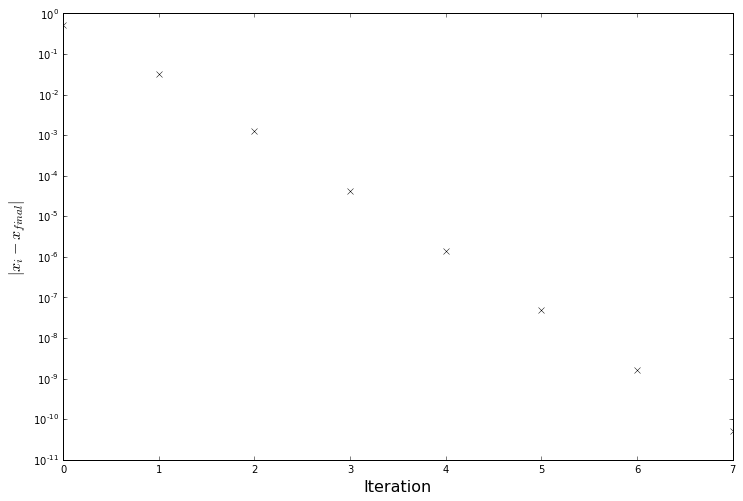

In [13]:
from matplotlib import pyplot

# Note that over the interval [0, 1] f' is between 2 and 4.
# We need 0 < m f' < 2, so choose m = 0.5
# We will also start from x = 0.

x = chord(fn_worksheet1_q4, 0.5, 0.0)
print("The root is approximately {:.5} where f is {:.5}"
      " after {} steps.\n"\
    .format(x[-1], fn_worksheet1_q4(x[-1]), len(x)))
      
fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.semilogy(range(len(x)-1), numpy.absolute(x[:-1] - x[-1]), 'kx')
pyplot.xlabel('Iteration', size = 16)
pyplot.ylabel('$|x_i - x_{final}|$', size = 16)
pyplot.show()